In [28]:
from frame_grabber import get_current_frame
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
rs = "RuneScape"
out_folder = "samples/"

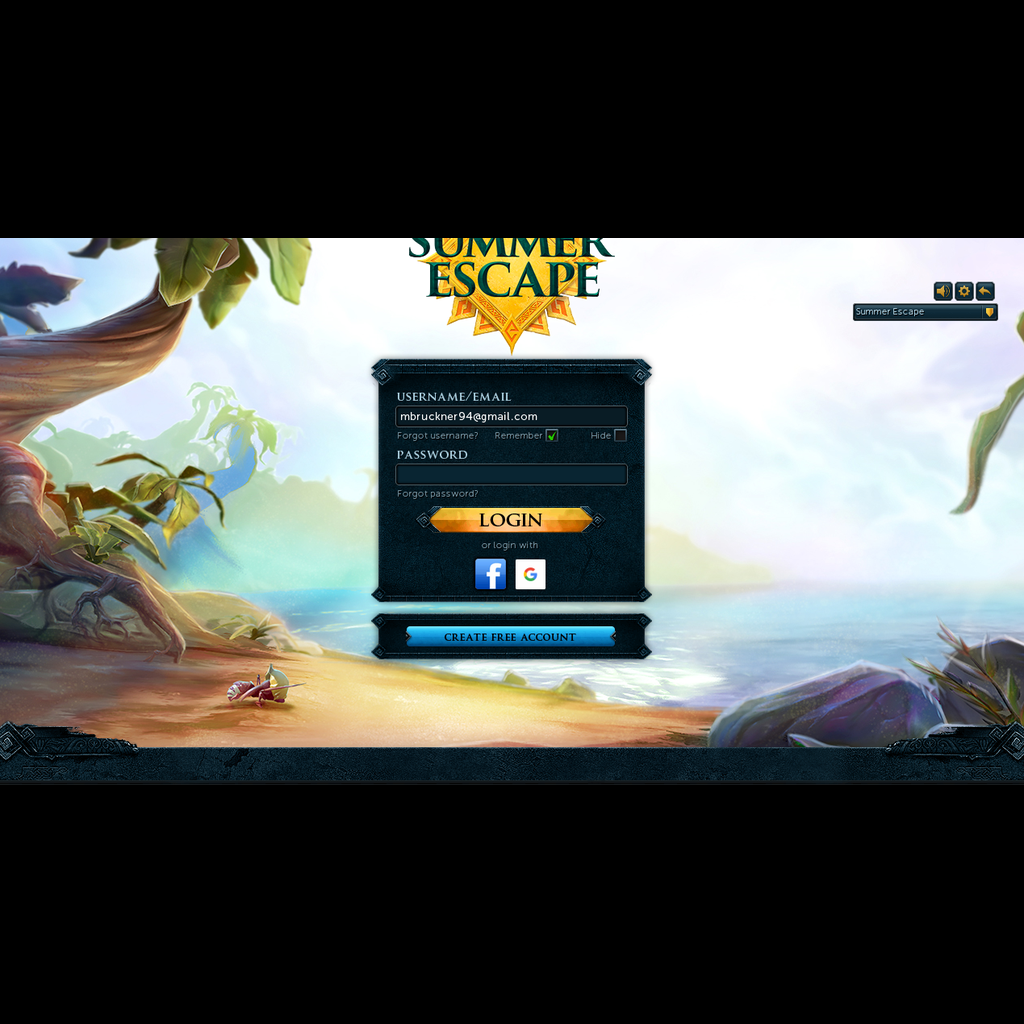

In [30]:
get_current_frame()
#record_game(out_folder)